# Single recurrent unit

![](https://miro.medium.com/v2/resize:fit:1200/format:webp/1*doIUh-KpF2CgEEgpytLkMA.png)


La salida de la unidad RNN en el instante de tiempo \( t \) se define como:

$$
h_t = \tanh\left(W_x \cdot x_t + W_h \cdot h_{t-1} + b\right)
$$

Donde:
- \( h_t \) es la salida en el tiempo \( t \).
- \( x_t \) es la entrada en el tiempo \( t \).
- \( h_{t-1} \) es el estado oculto previo en el tiempo \( t-1 \).
- \( W_x \) es la matriz de pesos para la entrada \( x_t \).
- \( W_h \) es la matriz de pesos para el estado oculto previo \( h_{t-1} \).
- \( b \) es el término de sesgo.
- \( \tanh(\cdot) \) es la función de activación tangente hiperbólica.

Así, la salida \( h_t \) se calcula realizando primero una suma ponderada de la entrada \( x_t \), el estado oculto previo \( h_{t-1} \) y el sesgo \( b \), seguida de la aplicación de la función de activación \( \tanh \) a esta suma:

$$
h_t = \tanh\left(\underbrace{W_x \cdot x_t}_{\text{Contribución de la entrada}} + \underbrace{W_h \cdot h_{t-1}}_{\text{Contribución del estado oculto}} + \underbrace{b}_{\text{Sesgo}}\right)
$$


In [ ]:
import numpy as np


# Custom RNN step function with zero-initialized hidden state
def rnn_step(x_t, h_t_prev, W_x, W_h, b):
    return np.tanh(np.dot(W_x, x_t) + np.dot(W_h, h_t_prev) + b)


# combina parametros de la celda W_x con el input como las neuronas normales
# pero suma un nuevo termino, un peso W_h que depende del input previo!

In [ ]:


# Example parameters
x_t = np.array([0.5])  # Example input at time t
h_t_prev = np.array([0.0])  # Initial hidden state set to 0

W_x = np.array([[0.8]])  # Weight for the input
W_h = np.array([[0.2]])  # Weight for the hidden state

b = np.array([0.1])  # Bias

# Custom feedforward step
h_t_custom = rnn_step(x_t, h_t_prev, W_x, W_h, b)
print("Custom RNN feedforward output:", h_t_custom)

Custom RNN feedforward output: [0.46211716]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Input

# Define the Keras model
model = Sequential([
        Input(shape=(1, 1)),
        SimpleRNN(units=1, activation='tanh', use_bias=True)])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set the weights manually
model.set_weights([W_x, W_h, b])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[0.8]], dtype=float32),
 array([[0.2]], dtype=float32),
 array([0.1], dtype=float32)]

In [ ]:

# Probamos que de lo mismo con x_t
x_train = np.array([[[0.5]]])


# Predict using the Keras model
prediction = model(x_train)
print("Keras RNN output:", prediction[0][0])


Keras RNN output: tf.Tensor(0.46211717, shape=(), dtype=float32)


# RNN

![](https://cdn-images-1.medium.com/max/800/1*xLcQd_xeBWHeC6CeYSJ9bA.png)



![](https://www.researchgate.net/profile/Mahindra-Rautela/publication/338422063/figure/fig5/AS:844611954151428@1578382590444/a-Folded-Recurrent-Neural-Network-b-Unfolded-Recurrent-Neural-Network-U-weight.ppm)

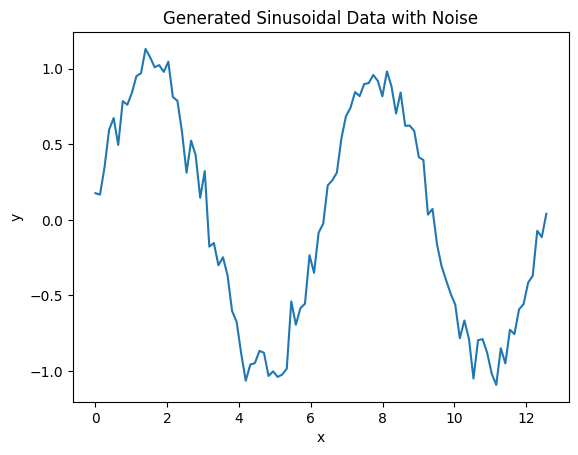

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal data with noise
np.random.seed(0)
n_points = 100
x = np.linspace(0, 4 * np.pi, n_points)
signal = np.sin(x) + np.random.normal(scale=0.1, size=n_points)

plt.plot(x, signal)
plt.title('Generated Sinusoidal Data with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Como procesamos el tiempo?

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [ ]:
signal.shape

(100,)

In [ ]:
# creamos 90 secuencias de 10 puntos y 90 predicciones



seq_length = 10
X, y = create_sequences(signal, seq_length)


X.shape, y.shape

((90, 10), (90,))

In [ ]:
import pandas as pd
df=pd.DataFrame(X)
df['y']=y
df

,0,1,2,3,4,5,6,7,8,9,y
0,0.176405,0.166608,0.349022,0.595752,0.672953,0.495180,0.785088,0.761011,0.839404,0.950692,0.969307
1,0.166608,0.349022,0.595752,0.672953,0.495180,0.785088,0.761011,0.839404,0.950692,0.969307,1.130235
2,0.349022,0.595752,0.672953,0.495180,0.785088,0.761011,0.839404,0.950692,0.969307,1.130235,1.074971
3,0.595752,0.672953,0.495180,0.785088,0.761011,0.839404,0.950692,0.969307,1.130235,1.074971,1.009022
4,0.672953,0.495180,0.785088,0.761011,0.839404,0.950692,0.969307,1.130235,1.074971,1.009022,1.023189
...,...,...,...,...,...,...,...,...,...,...,...
85,-0.789214,-0.878977,-1.016860,-1.091883,-0.849457,-0.949950,-0.727481,-0.755319,-0.592415,-0.557271,-0.415539
86,-0.878977,-1.016860,-1.091883,-0.849457,-0.949950,-0.727481,-0.755319,-0.592415,-0.557271,-0.415539,-0.370612
87,-1.016860,-1.091883,-0.849457,-0.949950,-0.727481,-0.755319,-0.592415,-0.557271,-0.415539,-0.370612,-0.072561
88,-1.091883,-0.849457,-0.949950,-0.727481,-0.755319,-0.592415,-0.557271,-0.415539,-0.370612,-0.072561,-0.113901


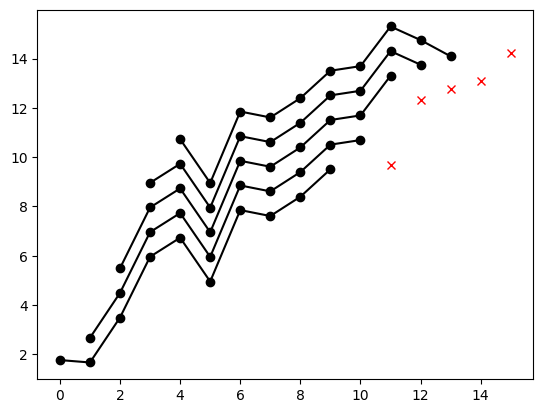

In [ ]:
for i,seq in enumerate(X[:5]):
  plt.plot(np.arange(10)+i,10*seq+i,'-ok')
  plt.plot(11+i,10*y[i]+i,'xr')

In [ ]:
import pandas as pd

In [ ]:

# Reshape for RNN (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# Define the model
model = Sequential([
    Input(shape=(seq_length, 1)),
    SimpleRNN(1),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, verbose=0)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12 (52.00 B)

In [ ]:
# Extract weights
rnn_weights = model.layers[0].get_weights()  # RNN layer weights
dense_weights = model.layers[1].get_weights()  # Dense layer weights


In [ ]:
rnn_weights

[array([[0.96408546]], dtype=float32),
 array([[-1.1382829]], dtype=float32),
 array([0.0071776], dtype=float32)]

In [ ]:

# Unpack RNN weights
# presente,pasado y bias
W_xh, W_hh, b_h = rnn_weights[0], rnn_weights[1], rnn_weights[2]
# Dense weights (activacion + sesgo)
W_hy, b_y = dense_weights[0], dense_weights[1]


In [ ]:
dense_weights

[array([[-0.06015556]], dtype=float32), array([-0.04794153], dtype=float32)]

In [ ]:
X[0]

array([[0.17640523],
       [0.16660817],
       [0.34902179],
       [0.59575178],
       [0.67295254],
       [0.49518014],
       [0.78508785],
       [0.76101074],
       [0.83940354],
       [0.95069185]])

In [ ]:
model.predict(X[0],verbose=0)

array([[-0.05849367],
       [-0.05794207],
       [-0.06783768],
       [-0.07944974],
       [-0.08257125],
       [-0.07500545],
       [-0.08664969],
       [-0.08581924],
       [-0.08843371],
       [-0.09171404]], dtype=float32)

In [ ]:
class SimpleRNN:
    def __init__(self, W_xh, W_hh, b_h, W_hy, b_y):
        self.W_xh = W_xh  # Input to hidden weights
        self.W_hh = W_hh  # Hidden to hidden weights
        self.b_h = b_h    # Hidden bias
        self.W_hy = W_hy  # Hidden to output weights
        self.b_y = b_y    # Output bias

    def forward(self, x_seq):
        """
        Perform the forward pass for a sequence.

        Args:
            x_seq: Input sequence of shape (sequence_length, input_dim)

        Returns:
            y: Prediction of shape (output_dim,)
        """
        h_prev = np.zeros(self.W_hh.shape[0])
        for x in x_seq:
            h = np.tanh(np.dot(x, self.W_xh) + np.dot(h_prev, self.W_hh) + self.b_h)
            h_prev = h

        y = np.dot(h, self.W_hy) + self.b_y
        return y

# Initialize the RNN with TensorFlow weights
rnn = SimpleRNN(W_xh, W_hh, b_h, W_hy, b_y)

# Use the RNN to make predictions on the data
predictions = np.array([rnn.forward(seq) for seq in X])


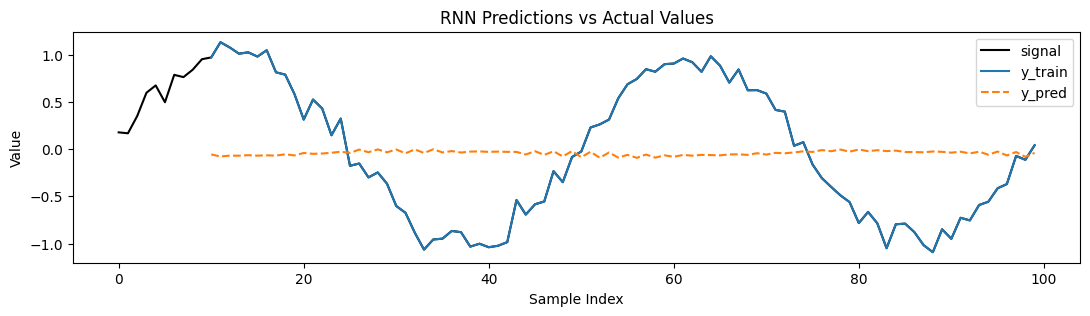

In [ ]:

# Compare predictions with actual values
plt.figure(figsize=(13,3))
plt.plot(np.arange(len(signal)),signal, 'k',label='signal')
plt.plot(np.arange(len(y))+10,y, label='y_train')
plt.plot(np.arange(len(y))+10,predictions, label='y_pred', linestyle='--')
plt.legend()
plt.title('RNN Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction shape: (1, 1)
Prediction value: 0.8199857


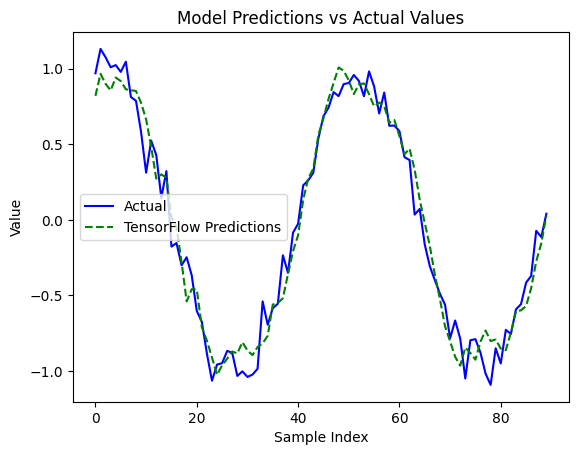

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense
import matplotlib.pyplot as plt

# Generate and prepare data
np.random.seed(0)
n_points = 100
x = np.linspace(0, 4 * np.pi, n_points)
y = np.sin(x) + np.random.normal(scale=0.1, size=n_points)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(y, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define and compile the model
model = Sequential([
    Input(shape=(seq_length, 1)),
    SimpleRNN(20),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=20, verbose=0)

# Predict on the entire dataset
predictions = model.predict(X,verbose=0)

# Predict on the first sequence
prediction = model.predict(X[0:1])
print("Prediction shape:", prediction.shape)
print("Prediction value:", prediction[0, 0])

# Plot the results
plt.plot(y, label='Actual', color='blue')
plt.plot(predictions, label='TensorFlow Predictions', linestyle='--', color='green')
plt.legend()
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,385 (5.41 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 924 (3.61 KB)

In [ ]:
# Extract weights
rnn_weights = model.layers[0].get_weights()  # SimpleRNN weights
dense_weights = model.layers[1].get_weights()  # Dense layer weights

# Unpack RNN weights
W_xh, W_hh, b_h = rnn_weights[0], rnn_weights[1], rnn_weights[2]
# Dense weights
W_hy, b_y = dense_weights[0], dense_weights[1]

In [ ]:
import numpy as np

class SimpleRNN:
    def __init__(self, W_xh, W_hh, b_h, W_hy, b_y):
        self.W_xh = W_xh  # Input to hidden weights
        self.W_hh = W_hh  # Hidden to hidden weights
        self.b_h = b_h    # Hidden bias
        self.W_hy = W_hy  # Hidden to output weights
        self.b_y = b_y    # Output bias

    def forward(self, x_seq):
        """
        Perform the forward pass for a sequence.

        Args:
            x_seq: Input sequence of shape (sequence_length, input_dim)

        Returns:
            y: Prediction of shape (output_dim,)
        """
        h_prev = np.zeros(self.W_hh.shape[0])
        for x in x_seq:
            h = np.tanh(np.dot(x, self.W_xh) + np.dot(h_prev, self.W_hh) + self.b_h)
            h_prev = h
        y = np.dot(h, self.W_hy) + self.b_y
        return y

# Initialize the RNN with TensorFlow weights
rnn = SimpleRNN(W_xh, W_hh, b_h, W_hy, b_y)

# Prepare the data
X, y = create_sequences(y, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Predict on the first sequence using the NumPy implementation
prediction_np = rnn.forward(X[0])

print("NumPy Prediction:", prediction_np)

# Predict on the first sequence using TensorFlow
prediction_tf = model.predict(X[0:1])

print("TensorFlow Prediction:", prediction_tf[0, 0])


NumPy Prediction: [-0.46093966]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
TensorFlow Prediction: -0.46093956


# Arquitecturas


![](https://cdn-images-1.medium.com/max/800/1*XosBFfduA1cZB340SSL1hg.png)


## One to one

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Create a simple dataset
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
X = data[:-1]  # Inputs: [0, 1, 2, 3, 4, 5, 6, 7, 8]
y = data[1:]   # Outputs: [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], 1, 1))

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (9, 1, 1)
Output shape: (9,)


In [ ]:
# Define the RNN model
model = Sequential()
model.add(Input(shape=(1, 1)))
model.add(SimpleRNN(10, activation='tanh'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=20, verbose=0)


In [ ]:
# Make predictions
predictions = model.predict(X, verbose=0)

# Display the predictions alongside the true values
for i in range(len(X)):
    print(f"Input: {X[i][0][0]}, Prediction: {predictions[i][0]}, True Value: {y[i]}")


Input: 0, Prediction: 0.10048844665288925, True Value: 1
Input: 1, Prediction: -0.21609020233154297, True Value: 2
Input: 2, Prediction: -0.4798681437969208, True Value: 3
Input: 3, Prediction: -0.6447133421897888, True Value: 4
Input: 4, Prediction: -0.7387430667877197, True Value: 5
Input: 5, Prediction: -0.7936384677886963, True Value: 6
Input: 6, Prediction: -0.8265664577484131, True Value: 7
Input: 7, Prediction: -0.8462433815002441, True Value: 8
Input: 8, Prediction: -0.8576133847236633, True Value: 9


# one to many

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, TimeDistributed

# Create a simple dataset
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
X = data[:-3]  # Inputs: [0, 1, 2, 3, 4, 5, 6]
y = np.array([[i+1, i+2, i+3] for i in X])  # Outputs: [[1, 2, 3], [2, 3, 4], ...]

# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], 1, 1))
y = y.reshape((y.shape[0], y.shape[1], 1))  # Reshape y to match the output format

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (7, 1, 1)
Output shape: (7, 3, 1)


In [ ]:
# Define the RNN model
model = Sequential()
model.add(SimpleRNN(10, input_shape=(1, 1), activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(1)))  # TimeDistributed wrapper to produce a sequence of outputs

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=100, verbose=0)


In [ ]:
# Make predictions
predictions = model.predict(X, verbose=0)

# Display the predictions alongside the true values
for i in range(len(X)):
    print(f"Input: {X[i][0][0]}, Prediction: {predictions[i].flatten()}, True Value: {y[i].flatten()}")


Input: 0, Prediction: [0.43282482], True Value: [1 2 3]
Input: 1, Prediction: [0.48216602], True Value: [2 3 4]
Input: 2, Prediction: [0.30015427], True Value: [3 4 5]
Input: 3, Prediction: [0.08385614], True Value: [4 5 6]
Input: 4, Prediction: [-0.07444188], True Value: [5 6 7]
Input: 5, Prediction: [-0.16980365], True Value: [6 7 8]
Input: 6, Prediction: [-0.219825], True Value: [7 8 9]


## many to one (classification)

In [ ]:
import numpy as np

# Create synthetic data
def generate_classification_data(num_samples, sequence_length, num_classes):
    X = np.random.rand(num_samples, sequence_length)
    # Create a simple rule for classification: sum > threshold -> class 1, else class 0
    y = (np.sum(X, axis=1) > (sequence_length / 2)).astype(int)
    return X, y

# Parameters
num_samples = 1000
sequence_length = 10
num_classes = 2  # Binary classification

# Generate data
X, y = generate_classification_data(num_samples, sequence_length, num_classes)


In [ ]:
X.shape

(1000, 10)

In [ ]:
y[:5]

array([0, 1, 1, 1, 0])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# Define the RNN model
model = Sequential()
model.add(Input(shape=(sequence_length, 1)))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape data for RNN
X_reshaped = X[..., np.newaxis]

# Train the model
model.fit(X_reshaped, y, epochs=10, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_reshaped, y, verbose=0)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


Loss: 0.24018606543540955
Accuracy: 0.9039999842643738
